 Importing necessary libraries

In [17]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar

Reading and extracting features (X) and labels (y) from the dataset 

In [6]:

dataset = pd.read_csv(r'C:\Users\manju\Downloads\CrediCardFraudDetectionApplicationNEW.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature scaling using MinMaxScaler

In [7]:

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


Training the Self-Organizing Map (SOM)

In [8]:

som = MiniSom(x = 10, y = 10, input_len = 16, sigma = 1.0, learning_rate = 0.1, neighborhood_function = 'bubble')
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


Visualizing the distance map of the SOM

In [9]:
distance_map = som.distance_map().round(1)
distance_map

array([[0.3, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.4, 0.4, 0.2],
       [0.5, 0.8, 0.7, 0.7, 1. , 0.7, 0.8, 0.7, 0.7, 0.4],
       [0.5, 0.8, 0.8, 0.7, 0.6, 0.7, 0.6, 0.7, 0.8, 0.4],
       [0.5, 0.9, 1. , 0.8, 0.7, 0.7, 0.6, 0.8, 0.8, 0.5],
       [0.5, 0.8, 0.8, 0.8, 0.7, 0.8, 0.9, 0.8, 0.8, 0.5],
       [0.6, 0.9, 0.7, 0.8, 0.9, 0.8, 0.8, 0.8, 0.8, 0.6],
       [0.5, 0.8, 0.8, 0.9, 0.7, 0.8, 0.8, 0.7, 0.7, 0.5],
       [0.5, 0.8, 0.9, 0.8, 0.8, 0.9, 0.8, 0.7, 0.8, 0.5],
       [0.5, 0.9, 0.8, 0.7, 0.7, 0.8, 0.7, 0.7, 0.8, 0.5],
       [0.3, 0.5, 0.5, 0.4, 0.5, 0.6, 0.4, 0.4, 0.4, 0.2]])

Calculating the number of grid cells with distance >= 0.5

dict_keys([(1, 2), (4, 7), (1, 8), (9, 5), (4, 5), (7, 3), (3, 0), (4, 9), (9, 6), (0, 1), (0, 6), (9, 1), (4, 1), (6, 9), (0, 7), (7, 1), (9, 8), (5, 6), (5, 4), (1, 1), (6, 2), (5, 9), (2, 2), (1, 3), (7, 0), (3, 3), (8, 1), (1, 6), (4, 6), (6, 0), (0, 8), (5, 7), (9, 3), (3, 4), (8, 2), (8, 6), (6, 3), (5, 8), (6, 7), (7, 4), (8, 3), (4, 4), (7, 9), (3, 6), (4, 0), (2, 0), (8, 7), (4, 2), (8, 4), (0, 5), (7, 6), (9, 2), (1, 5), (9, 9), (5, 2), (3, 9), (2, 9), (7, 8), (2, 4), (2, 5), (1, 4), (0, 9), (1, 7), (2, 1), (6, 8), (0, 0), (8, 0), (3, 7), (0, 3), (5, 3), (6, 6), (2, 8), (4, 3), (6, 4), (7, 2), (5, 1), (0, 4), (2, 3), (7, 7), (3, 5), (3, 2), (9, 0), (8, 8), (3, 8), (1, 0), (3, 1), (5, 5), (8, 5), (5, 0), (9, 7), (4, 8), (7, 5), (6, 5), (0, 2), (2, 6), (2, 7)])

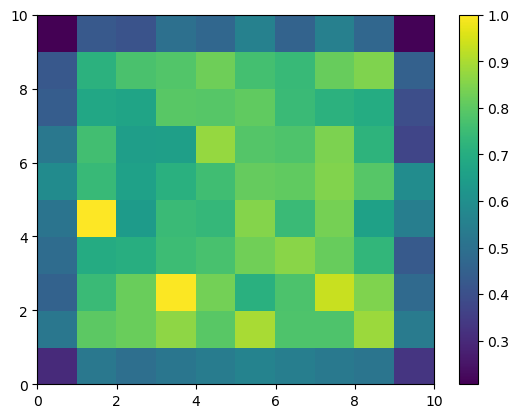

In [10]:

index = []
for i in range(10):
    for j in range(10):
        if(distance_map[i,j]>=0.5):
            index.append([i,j])
len(index)

pcolor(som.distance_map().T)
colorbar() #gives legend

mappings = som.win_map(X)
mappings.keys()


Calculating the total number of fraudulent transactions

In [11]:

fraud_list = []
sum = 0
for x in index:
    fraud_list.append(mappings[(x[0],x[1])])
    sum = sum + len(mappings[(x[0],x[1])])
sum

599

Converting list of fraudulent transactions to array and then inverse transforming to get original values

In [12]:

frauds = []
for x in fraud_list:
    for y in x:
        frauds.append(y)

        
fraud_array = np.asarray(frauds)
fraud_inverse_transformed = sc.inverse_transform(frauds)


Counting the number of correctly predicted frauds and wrongly predicted frauds

In [13]:
count = 0
fraud_id_list = []
for x in fraud_inverse_transformed:
    fraud_id_list.append(x[0])
print('Total frauds :{}'.format(len(fraud_id_list)))

count = 0
right_prediction_index =[]
wrong_prediction_index =[]
for x in fraud_id_list:
    for i,y in enumerate(dataset['CustomerID']):
        if(x == y):
            if(dataset['Class'][i] == 0):
                count = count+1
                right_prediction_index.append(i)
            else:
                wrong_prediction_index.append(i)


Total frauds :599


Calculating the percentages of correct predictions

In [14]:
a = len(right_prediction_index)
b=len(wrong_prediction_index)
l = len(fraud_id_list)
print('Right Prediction:{}'.format((a/l)*100))


Right Prediction:59.432387312186975


In [15]:

total_population = dataset.shape[0]
total_actual_frauds  = dataset[dataset['Class'] == 0].shape[0]

Print percentages of predictions

In [16]:
print('Percentage of frauds detected out of total actual frauds:{}'.format((a/total_actual_frauds)*100))
print('Percentage of fraud customers in population as claimed by prediction model:{}'.format((a/total_population)*100))
print('Actual precentage of frauds out of total population:{}'.format((total_actual_frauds/total_population)*100))
print('Affected population(percentage of custormers who were not fraud but were predicted as fraud)):{}'.format((b/690)*100))

Percentage of frauds detected out of total actual frauds:92.95039164490862
Percentage of fraud customers in population as claimed by prediction model:51.59420289855072
Actual precentage of frauds out of total population:55.507246376811594
Affected population(percentage of custormers who were not fraud but were predicted as fraud)):35.21739130434783
